In [ ]:
!pwd
!git clone https://github.com/ShouvikGhosh2048/AML-project/

/content
Cloning into 'AML-project'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 46 (delta 10), reused 42 (delta 6), pack-reused 0
Unpacking objects: 100% (46/46), 6.52 KiB | 392.00 KiB/s, done.


In [ ]:
%cd AML-project/

/content/AML-project


In [ ]:
!ls -a

.	baseline.ipynb	    data.dvc	.git		   templates
..	count_files.sh	    .dvc	.gitignore
app.py	create_datasets.sh  .dvcignore	requirements.text


In [ ]:
!python3 -m pip install -r requirements.text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.2/408.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3

In [ ]:
!dvc pull

Checkout:   0% 0/41160 [00:00<?, ?file/s{'info': ''}]
!
Building data objects from data          |0.00 [00:00,      ?obj/s]
Building data objects from data          |1.39k [00:00,  13.8kobj/s]
Building data objects from data          |2.79k [00:00,  13.9kobj/s]
Building data objects from data          |4.25k [00:00,  14.2kobj/s]
Building data objects from data          |5.68k [00:00,  14.2kobj/s]
Building data objects from data          |7.10k [00:00,  13.8kobj/s]
Building data objects from data          |8.60k [00:00,  14.2kobj/s]
Building data objects from data          |10.0k [00:00,  14.3kobj/s]
Building data objects from data          |11.5k [00:00,  14.1kobj/s]
Building data objects from data          |12.9k [00:00,  11.8kobj/s]
Building data objects from data          |14.3k [00:01,  12.5kobj/s]
Building data objects from data          |15.8k [00:01,  13.1kobj/s]
Building data objects from data          |17.3k [00:01,  13.6kobj/s]
Building data objects from data          |18.7k 

In [ ]:
%%bash
DIRECTORIES=( $(ls data/Images) )

rm -rf data/smaller_dataset
mkdir data/smaller_dataset
mkdir data/smaller_dataset/train
mkdir data/smaller_dataset/val

for DIRECTORY in "${DIRECTORIES[@]}"
do
    files=( $(ls data/Images/$DIRECTORY) )
    # creating training dataset
    echo "Copying top 50 files from data/Images/$DIRECTORY to data/smallar_dataset/train/$DIRECTORY"
    mkdir "data/smaller_dataset/train/$DIRECTORY"
    for i in {1..50}
    do
        cp data/Images/$DIRECTORY/${files[i]} data/smaller_dataset/train/$DIRECTORY/${files[i]}
    done

    # creating validation dataset
    echo "Copying next 10 files from data/Images/$DIRECTORY to data/smallar_dataset/val/$DIRECTORY"
    mkdir "data/smaller_dataset/val/$DIRECTORY"
    for i in {51..60}
    do
        cp data/Images/$DIRECTORY/${files[i]} data/smaller_dataset/val/$DIRECTORY/${files[i]}
    done
done



Copying top 50 files from data/Images/n02085620-Chihuahua to data/smallar_dataset/train/n02085620-Chihuahua
Copying next 10 files from data/Images/n02085620-Chihuahua to data/smallar_dataset/val/n02085620-Chihuahua
Copying top 50 files from data/Images/n02085782-Japanese_spaniel to data/smallar_dataset/train/n02085782-Japanese_spaniel
Copying next 10 files from data/Images/n02085782-Japanese_spaniel to data/smallar_dataset/val/n02085782-Japanese_spaniel
Copying top 50 files from data/Images/n02085936-Maltese_dog to data/smallar_dataset/train/n02085936-Maltese_dog
Copying next 10 files from data/Images/n02085936-Maltese_dog to data/smallar_dataset/val/n02085936-Maltese_dog
Copying top 50 files from data/Images/n02086079-Pekinese to data/smallar_dataset/train/n02086079-Pekinese
Copying next 10 files from data/Images/n02086079-Pekinese to data/smallar_dataset/val/n02086079-Pekinese
Copying top 50 files from data/Images/n02086240-Shih-Tzu to data/smallar_dataset/train/n02086240-Shih-Tzu
Co

In [ ]:
!ls -a data/smaller_dataset/train/n02085620-Chihuahua/

.		     n02085620_1235.jpg   n02085620_1620.jpg
..		     n02085620_12718.jpg  n02085620_1765.jpg
n02085620_10131.jpg  n02085620_1271.jpg   n02085620_1816.jpg
n02085620_10621.jpg  n02085620_1298.jpg   n02085620_1862.jpg
n02085620_1073.jpg   n02085620_13151.jpg  n02085620_1916.jpg
n02085620_10976.jpg  n02085620_1321.jpg   n02085620_199.jpg
n02085620_11140.jpg  n02085620_13383.jpg  n02085620_2053.jpg
n02085620_11238.jpg  n02085620_1346.jpg   n02085620_2188.jpg
n02085620_11258.jpg  n02085620_13964.jpg  n02085620_2204.jpg
n02085620_11337.jpg  n02085620_14252.jpg  n02085620_2208.jpg
n02085620_11477.jpg  n02085620_14413.jpg  n02085620_242.jpg
n02085620_1152.jpg   n02085620_14516.jpg  n02085620_2479.jpg
n02085620_11696.jpg  n02085620_1455.jpg   n02085620_2507.jpg
n02085620_11818.jpg  n02085620_1492.jpg   n02085620_2517.jpg
n02085620_11948.jpg  n02085620_1502.jpg   n02085620_2590.jpg
n02085620_1205.jpg   n02085620_1558.jpg   n02085620_2614.jpg
n02085620_12101.jpg  n02085620_1569.jpg
n02085620_1

In [ ]:
!ls -a data/smaller_dataset/val/n02085620-Chihuahua/

.		    n02085620_2693.jpg	n02085620_2793.jpg  n02085620_2903.jpg
..		    n02085620_2706.jpg	n02085620_2815.jpg  n02085620_2921.jpg
n02085620_2650.jpg  n02085620_275.jpg	n02085620_2887.jpg  n02085620_2937.jpg


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
data_dir = 'data/smaller_dataset/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

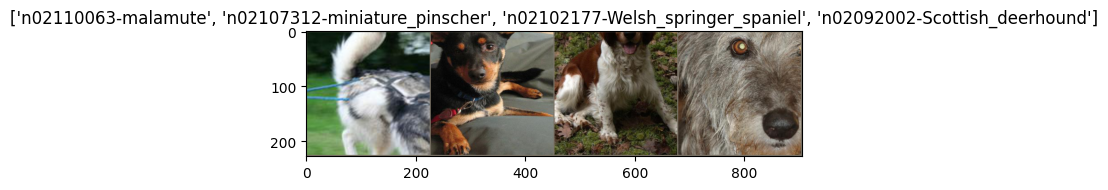

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# updating only the last layer
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 4.0441 Acc: 0.1183
val Loss: 1.8287 Acc: 0.5167

Epoch 1/24
----------
train Loss: 2.8980 Acc: 0.3042
val Loss: 1.2521 Acc: 0.6225

Epoch 2/24
----------
train Loss: 2.4939 Acc: 0.3893
val Loss: 1.0357 Acc: 0.6808

Epoch 3/24
----------
train Loss: 2.3299 Acc: 0.4195
val Loss: 0.9819 Acc: 0.6892

Epoch 4/24
----------
train Loss: 2.1804 Acc: 0.4478
val Loss: 0.9535 Acc: 0.6950

Epoch 5/24
----------
train Loss: 2.1311 Acc: 0.4558
val Loss: 0.8529 Acc: 0.7308

Epoch 6/24
----------
train Loss: 2.0343 Acc: 0.4912
val Loss: 0.8525 Acc: 0.7433

Epoch 7/24
----------
train Loss: 1.8823 Acc: 0.5278
val Loss: 0.7523 Acc: 0.7600

Epoch 8/24
----------
train Loss: 1.8358 Acc: 0.5485
val Loss: 0.7930 Acc: 0.7550

Epoch 9/24
----------
train Loss: 1.8663 Acc: 0.5423
val Loss: 0.8186 Acc: 0.7550

Epoch 10/24
----------
train Loss: 1.8543 Acc: 0.5390
val Loss: 0.7702 Acc: 0.7558

Epoch 11/24
----------
train Loss: 1.8216 Acc: 0.5495
val Loss: 0.7584 Acc: 0.7567

Ep

In [ ]:
# saving the model
model_scripted = torch.jit.script(model_conv) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save


In [ ]:
# loading the model
loaded_model = torch.jit.load('model_scripted.pt')
loaded_model.eval()

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
    )
    (1): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)

In [ ]:
from google.colab import files
files.download('./model_scripted.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>